# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from IPython.display import HTML
from IPython.display import display

warnings.filterwarnings('ignore')

#%matplotlib ipympl # Interactive mode
%matplotlib inline

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Importing neccesary libraries.

<a href="javascript:code_toggle()">--></a>''')
display(tag)

### Generate the dataset 

In [2]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasdas.

<a href="javascript:code_toggle()">--></a>''')
display(tag)

samples = 50

function = lambda X: np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(samples))
y = function(X) + np.random.randn(samples) * 0.3

print('Dataset (X)' + '\n', pd.Series(X).head(), '\n')
print('Target (y)' + '\n', pd.Series(y).head(), '\n')

Dataset (X)
 0    0.000206
1    0.032530
2    0.054676
3    0.089308
4    0.090911
dtype: float64 

Target (y)
 0    0.853996
1    0.651057
2    1.258829
3    0.794763
4    0.422930
dtype: float64 



### Create a function to set the degree

In [3]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasdas.

<a href="javascript:code_toggle()">--></a>''')
display(tag)

def evaluateFit(degrees, X, y):
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), 
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]),
             label="Model")
    plt.plot(X_test, function(X_test), label="function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees,
                                                           -scores.mean(),
                                                           scores.std()))
    plt.show()

### Evaluate the model 

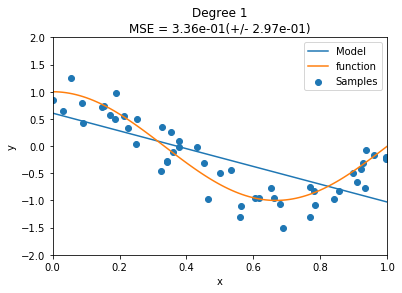

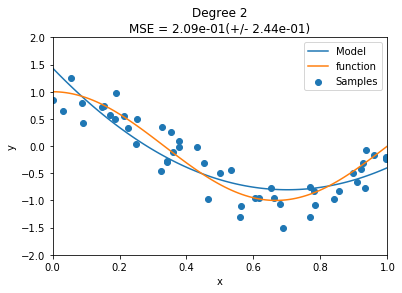

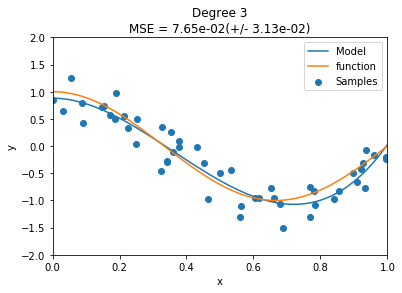

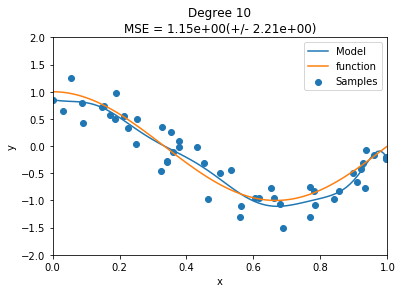

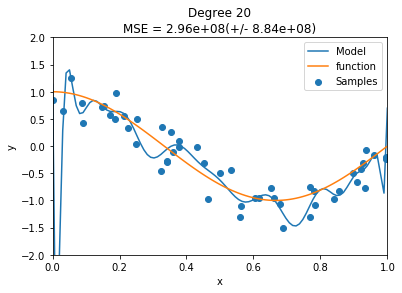

In [7]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasdas.

<a href="javascript:code_toggle()">--></a>''')
display(tag)

for n in [1, 2, 3, 10, 20]:
    evaluateFit(n, X, y)